In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os #importing necessary liberaries

In [ ]:
path = kagglehub.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /kaggle/input/multiple-linear-regression-dataset
['.nfs000000002e0aaa770000006c', 'multiple_linear_regression_dataset.csv']


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/hussainnasirkhan/multiple-linear-regression-dataset/versions/1/multiple_linear_regression_dataset.csv')

In [ ]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [ ]:
df.isnull().sum() #no null values apparently

,0
age,0
experience,0
income,0


In [ ]:
df.duplicated().sum() #no duplicated values too

np.int64(0)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go #libraries to plot 3d graphs

In [ ]:
fig = px.scatter_3d(df, x='age', y='experience', z='income')
fig.show() #displaying the 3d graph for feature and target columns

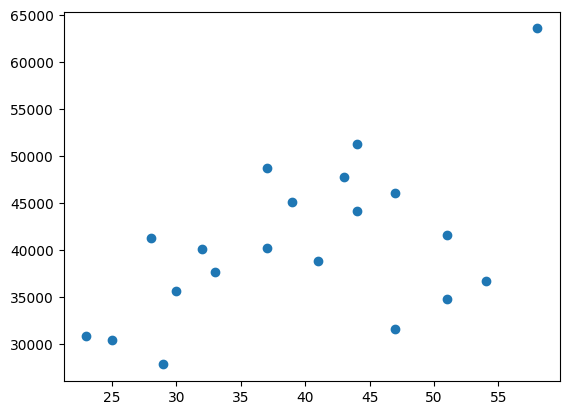

In [ ]:
plt.scatter(df['age'],df['income']) #scatter plot of age and income we can see that it is not linear relation between these

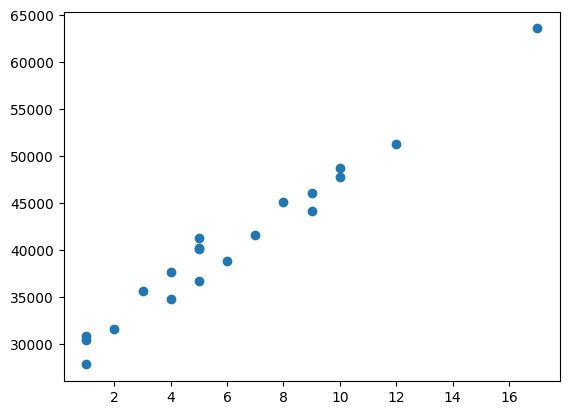

In [ ]:
plt.scatter(df['experience'],df['income']) #experience has more linear relation with target column

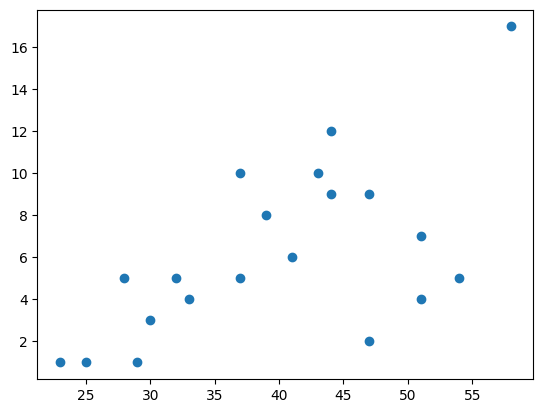

In [ ]:
plt.scatter(df['age'],df['experience']) #both columns together also dont have linear realtionship

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score #sklearn libraries for train test split , lr, and r2 score

In [ ]:
x = df.drop(['income'],axis=1)
y = df.drop(['age','experience'],axis=1) #spliting data into x and y feature and target column

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2) #spliting the data in 80:20

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions = lr.predict(x_test)

In [ ]:
r2 = r2_score(y_test,predictions)
print("R2 score for the Model",r2) #r2 score for model evaluation it is good enough

R2 score for the Model 0.9579002513351036


In [ ]:
print("Adjacent R2 Error", (1 - ((1-r2)*(x_test.shape[0] -1)) / (x_test.shape[0]-1-1)))

Adjacent R2 Error 0.9368503770026554


In [ ]:
lr.coef_ #values of Betas

array([[-102.88197553, 2191.86022152]])

In [ ]:
lr.intercept_ #beta zero

array([31439.55229535])

<h1> Now lets use custom made MLR </h1>

In [ ]:
class mylr: # a class created by using my name
  def _init_(self): #initializing the coef and intercept in this function
    self.coef = None
    self.intercept = None
  def fit(self,x_train,y_train): #function to pass data to model for calculation
    x_train = np.insert(x_train,0,1,axis=1) #using npinsert we insert 1 at first column for Beta0

    #calculation using formula which picture will be attached
    betas = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train) #formula for betas
    self.intercept = betas[0] #took out beta 0 which will be common all across and is intercept
    self.coef = betas[1:] #further then 1 all are coeff so given here

  def predict(self,x_test):
    y_pred = np.dot(x_test,self.coef) + self.intercept #doing dot product of every value with relevent coeficient or beta and adding into intercept to get the answer
    return y_pred


In [ ]:
lrs = mylr()

In [ ]:
lrs.fit(x_train,y_train)

In [ ]:
predictionsm = lrs.predict(x_test)

In [ ]:
r22 = r2_score(y_test,predictionsm)
print("R2 score from Coded model ", r22) #score came out to be same as sklearn library so it proves same is being used inside of sklearn library
print("R2 score from Sklearn model ", r2)
#both turn out to be same

R2 score from Coded model  0.9579002513351086
R2 score from Sklearn model  0.9579002513351036


In [ ]:
print("Adjacent R2 Error from SKLearn Model", (1 - ((1-r2)*(x_test.shape[0] -1)) / (x_test.shape[0]-1-1)))
print("Adjacent R2 Error from Coded Model Object", (1 - ((1-r22)*(x_test.shape[0] -1)) / (x_test.shape[0]-1-1)))

Adjacent R2 Error from SKLearn Model 0.9368503770026554
Adjacent R2 Error from Coded Model Object 0.9368503770026628


In [ ]:
print("Coefficient of SKlearn Model", lr.coef_)
print("Coefficient of Coded Model", lrs.coef) #same

Coefficient of SKlearn Model [[-102.88197553 2191.86022152]]
Coefficient of Coded Model [[-102.88197553]
 [2191.86022152]]


In [ ]:
print("Intercept of SKlearn Model", lr.intercept_)
print("Intercept of Coded Model", lrs.intercept) #same and proves that Sklearn also use the OLS method

Intercept of SKlearn Model [31439.55229535]
Intercept of Coded Model [31439.55229535]


In [ ]:
x = np.linspace(-5,5,10)
y = np.linspace(-5,5,10)
xGrid,yGrid = np.meshgrid(y,x)
final = np.vstack((xGrid.ravel(),yGrid.ravel())).T
z_final = lr.predict(final).reshape(10,10)
z = z_final
final = np.vstack((xGrid.ravel(),yGrid.ravel())).T

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
df.columns

Index(['age', 'experience', 'income'], dtype='object')

In [ ]:
fig = px.scatter_3d(df, x='age', y='experience', z='income')
fig.add_trace(go.Surface(x=x,y=y,z=z))
fig.show() #tried to show the hyper plain but it isn't working right will change in next versions